### DIAMOND PRICES - ADVANCED REGRESSION TECHNIQUES

This is a dataset containing 11 explanatory variables describing diamonds.
Data set available at this link: https://www.kaggle.com/datasets/shivam2503/diamonds 

Here I will compare several regression techniques:

Simple linear regression using features with highest correlation with target variable,
Linear regression with Ridge/Lasso regularization,
Principal Component Analysis,

XGBoost (gradient boosting decision trees)

DATA SET INFO:
A data frame with 53940 rows and 10 variables:
price
price in US dollars ( $ 326- 18,823)
carat
weight of the diamond (0.2--5.01)
cut
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color
diamond colour, from J (worst) to D (best)
clarity
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x
length in mm (0--10.74)
y
width in mm (0--58.9)
z
depth in mm (0--31.8)
depth
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table
width of top of diamond relative to widest point (43--95)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('diamonds.csv')

In [6]:
train

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
train.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [8]:
train.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
train.drop('Unnamed: 0',axis=1,inplace=True) #We can drop Unnamed:0 since we already have the index column

<AxesSubplot:>

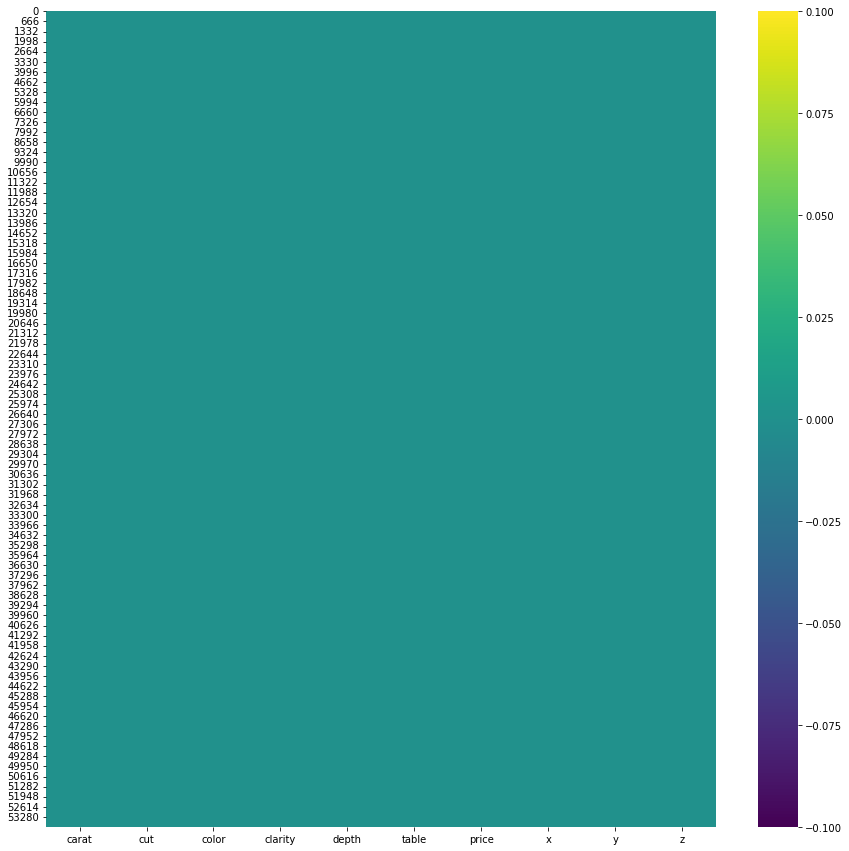

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap='viridis')


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = list(train.select_dtypes(include=numerics).columns)
numerical_features

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

<AxesSubplot:xlabel='price'>

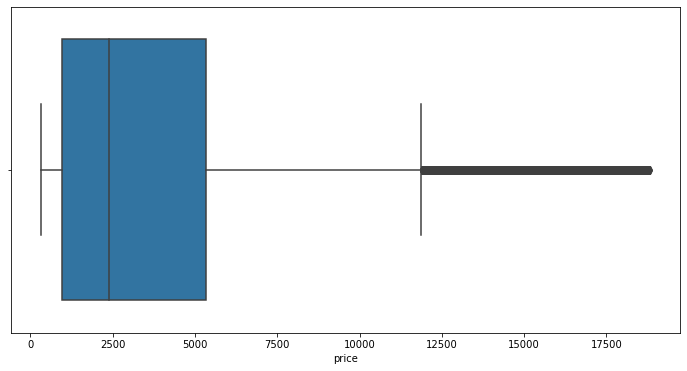

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='price',data=train)

<AxesSubplot:xlabel='price', ylabel='carat'>

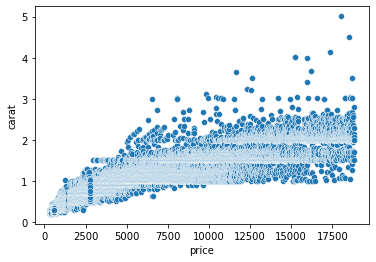

In [13]:
sns.scatterplot(x='price',y='carat',data=train)

<AxesSubplot:xlabel='price', ylabel='depth'>

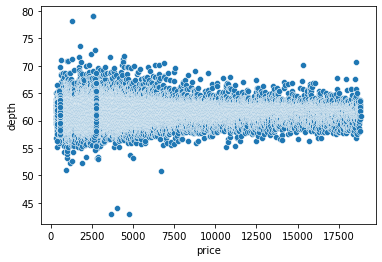

In [14]:
sns.scatterplot(x='price',y='depth',data=train)

In [17]:
train = train.drop(train[train["x"]<=0].index)
train = train.drop(train[train["y"]<=0].index)
train = train.drop(train[train["z"]<=0].index)
train.shape

(53920, 10)

In [21]:
train['x'].describe()

count    53920.000000
mean         5.731627
std          1.119423
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

In [22]:
train['y'].describe()

count    53920.000000
mean         5.734887
std          1.140126
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

In [31]:
train[(train['y']>10)].count()

carat      5
cut        5
color      5
clarity    5
depth      5
table      5
price      5
x          5
y          5
z          5
dtype: int64

In [32]:
train = train[(train['y']<=10)]

In [33]:
train['z'].describe()

count    53915.000000
mean         3.539762
std          0.701879
min          1.070000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

In [39]:
train[(train['z']>10)].count()

carat      1
cut        1
color      1
clarity    1
depth      1
table      1
price      1
x          1
y          1
z          1
dtype: int64

In [40]:
train = train[(train['z']<=10)]

In [41]:
train['price'].describe()

count    53914.000000
mean      3930.168936
std       3986.071720
min        326.000000
25%        949.000000
50%       2401.000000
75%       5322.000000
max      18823.000000
Name: price, dtype: float64

In [45]:
train[(train['price']>18500)].count()

carat      100
cut        100
color      100
clarity    100
depth      100
table      100
price      100
x          100
y          100
z          100
dtype: int64

In [46]:
train['table'].describe()

count    53914.000000
mean        57.456835
std          2.234068
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [47]:
train['carat'].describe()

count    53914.000000
mean         0.797480
std          0.472972
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          4.130000
Name: carat, dtype: float64

In [52]:
train['depth'].describe()

count    53914.000000
mean        61.749434
std          1.432157
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

<AxesSubplot:xlabel='cut', ylabel='price'>

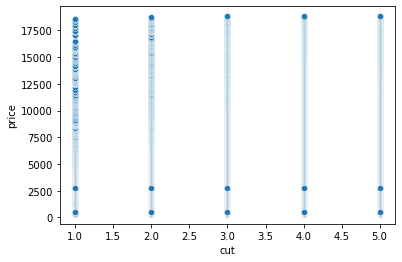

In [92]:
sns.scatterplot(x='cut', y='price',data=train)

In [57]:
train['cut'].unique() 

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [59]:
def quality(rank):
    ranking = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
    return(ranking[rank])
train['cut'] = train['cut'].apply(quality)

<AxesSubplot:xlabel='cut', ylabel='Count'>

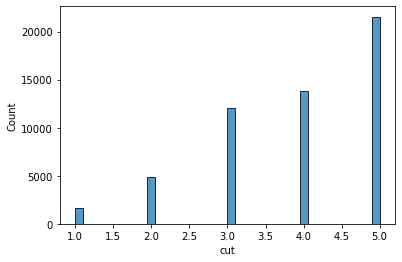

In [71]:
sns.histplot(train['cut'])

In [72]:
train['color'].unique() 

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<AxesSubplot:xlabel='price', ylabel='color'>

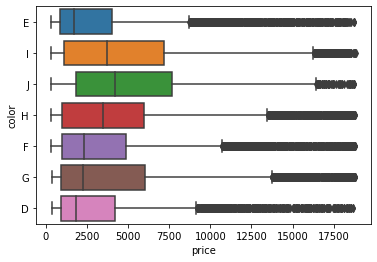

In [74]:
sns.boxplot(x='price',y='color',data=train)

In [76]:
def colorrank(rank):
    ranking = {'D':7,'E':6,'F':5,'G':4, 'H':3, 'I':2, 'J':1}
    return(ranking[rank])
train['color'] = train['color'].apply(colorrank)

<AxesSubplot:xlabel='color', ylabel='Count'>

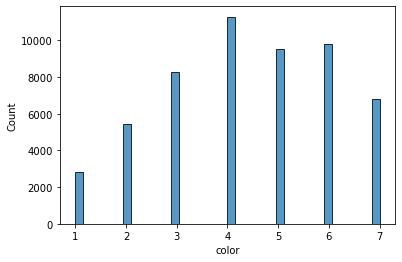

In [77]:
sns.histplot(train['color'])

In [78]:
train['clarity'].unique() 

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<AxesSubplot:xlabel='price', ylabel='clarity'>

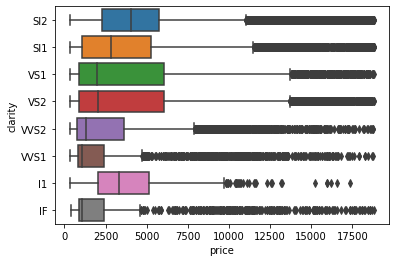

In [80]:
sns.boxplot(x='price',y='clarity',data=train)

In [82]:
def clarityrank(rank):
    ranking = {'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}
    return(ranking[rank])
train['clarity'] = train['clarity'].apply(clarityrank)

<AxesSubplot:xlabel='clarity', ylabel='Count'>

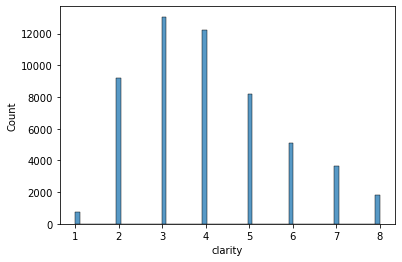

In [84]:
sns.histplot(train['clarity'])

In [91]:
train.corr()['price'].drop('price').sort_values(ascending=False)

carat      0.921998
y          0.888749
x          0.887152
z          0.882040
table      0.127140
depth     -0.010994
cut       -0.053178
clarity   -0.146456
color     -0.172122
Name: price, dtype: float64

# REGRESSION

now we can start the regression. We will try the following approaches:
we keep only high-correlation Features and do linear regression.
we try to find ideal number of features using L1 (Lasso) and L2 (Ridge) regularization.
We use PCA to reduce dimensions.
We use XGBOOST.

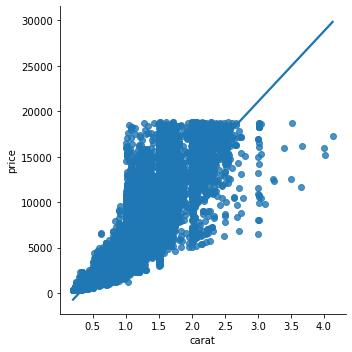

In [93]:
sns.lmplot(x='carat',y='price',data=train)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

RMSE: 1503.0348758184703


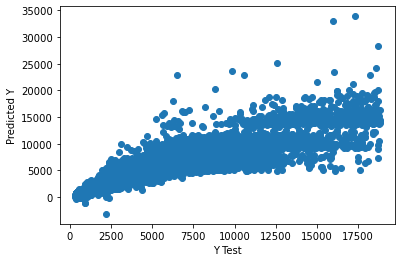

In [95]:
X = train[['carat','x','y','z']] #4 highest-corr
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [96]:
np.mean(train['price'])

3930.168935712431

RMSE: 1491.875816500041


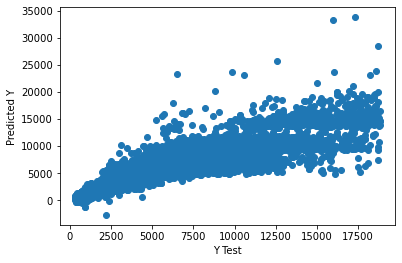

In [100]:
X = train[['carat','x','y','z','table','depth']] #6 highest-corr
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE down to 1491.8 k. So, let's use Ridge and Lasso regularization to find optimal number of features to be included.

Ridge regularization:

In [101]:
X = train.drop('price',axis=1)
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import RidgeCV
alpha_list = np.logspace(-3, 3, 100)
#print(alpha_list)
rid = RidgeCV(cv=5, alphas=alpha_list)
rid.fit(X_train, y_train)
predictions = rid.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',rid.alpha_)

RMSE: 1201.748216824337
alpha:  3.2745491628777286


Best result is with alpha=3,where we get an RMSE of about 1201.7 k


Text(0, 0.5, 'Predicted Y')

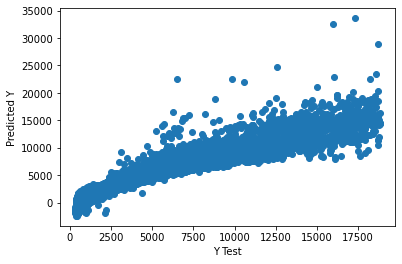

In [103]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Lasso regularization:

RMSE: 1201.8740662588757
alpha:  0.30538555088334157
number of features:  9


Text(0, 0.5, 'Predicted Y')

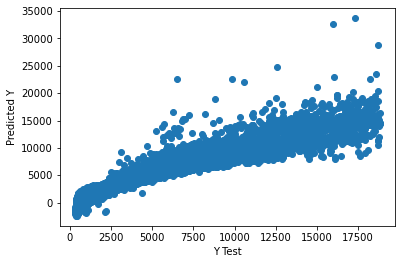

In [104]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LassoCV
alpha_list = np.logspace(-3, 3, 100)
#print(alpha_list)
las = LassoCV(cv=5, alphas=alpha_list, random_state=101)
las.fit(X_train, y_train)
predictions = las.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',las.alpha_)
print('number of features: ',np.sum(las.coef_!=0))

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [105]:
from sklearn.decomposition import PCA

<AxesSubplot:ylabel='price'>

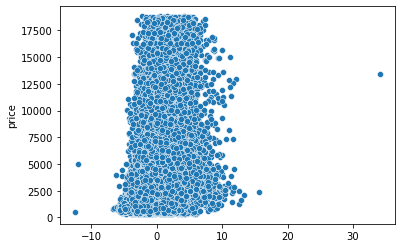

In [106]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
sns.scatterplot(X_train_pca[:,0],y_train)

In [107]:
components = [2,3,4,5,6,7,8,9]
rmse = []
train_score = []
test_score = []
lm = LinearRegression()
    
for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lm.fit(X_train_pca,y_train)
    predictions = lm.predict(X_test_pca)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    train_score.append(lm.score(X_train_pca,y_train))
    test_score.append(lm.score(X_test_pca,y_test))
    
results_pca = pd.DataFrame(list(zip(components,rmse,train_score,test_score)),
                  columns=['components','rmse','train_score','test_score'])
results_pca

,components,rmse,train_score,test_score
0,2,2922.468829,0.463629,0.458014
1,3,2921.834103,0.463771,0.458250
2,4,2695.398271,0.544825,0.538965
3,5,1558.854589,0.846695,0.845795
4,6,1556.339035,0.847318,0.846292
5,7,1210.992738,0.908371,0.906938
6,8,1205.283099,0.909480,0.907814
7,9,1201.693697,0.909818,0.908362


In [117]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [119]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=101)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [120]:
predictions = xgb_model.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 520.859491644334


In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[3,4,5,6,7]} #Depth of decision tree
grid = GridSearchCV(XGBRegressor(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .......................max_depth=3;, score=0.978 total time=   0.6s
[CV 2/5] END .......................max_depth=3;, score=0.979 total time=   0.6s
[CV 3/5] END .......................max_depth=3;, score=0.979 total time=   0.6s
[CV 4/5] END .......................max_depth=3;, score=0.978 total time=   0.6s
[CV 5/5] END .......................max_depth=3;, score=0.979 total time=   0.6s
[CV 1/5] END .......................max_depth=4;, score=0.980 total time=   0.8s
[CV 2/5] END .......................max_depth=4;, score=0.981 total time=   0.8s
[CV 3/5] END .......................max_depth=4;, score=0.981 total time=   0.8s
[CV 4/5] END .......................max_depth=4;, score=0.981 total time=   0.8s
[CV 5/5] END .......................max_depth=4;, score=0.981 total time=   0.8s
[CV 1/5] END .......................max_depth=5;, score=0.980 total time=   1.0s
[CV 2/5] END .......................max_depth=5;,

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                   

In [123]:
grid.best_params_

{'max_depth': 6}

In [124]:
predictions = grid.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 520.859491644334


# Summary of results:

Simple linear regression with 6 top-highest correl. features: RMSE = 1491.8k

Linear regression with Ridge regularization: RMSE = 1201.7k

Linear regression with Lasso regularization: RMSE = 1201.8k

Principal component analysis: RMSE = 1201.6k

XGBoost: RMSE = 520.8k